# Project-2

Creating a model that predicts house rent using machine learning.

Name: Rishabhraj Srivastava

College: Vellore Institute of Technology

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


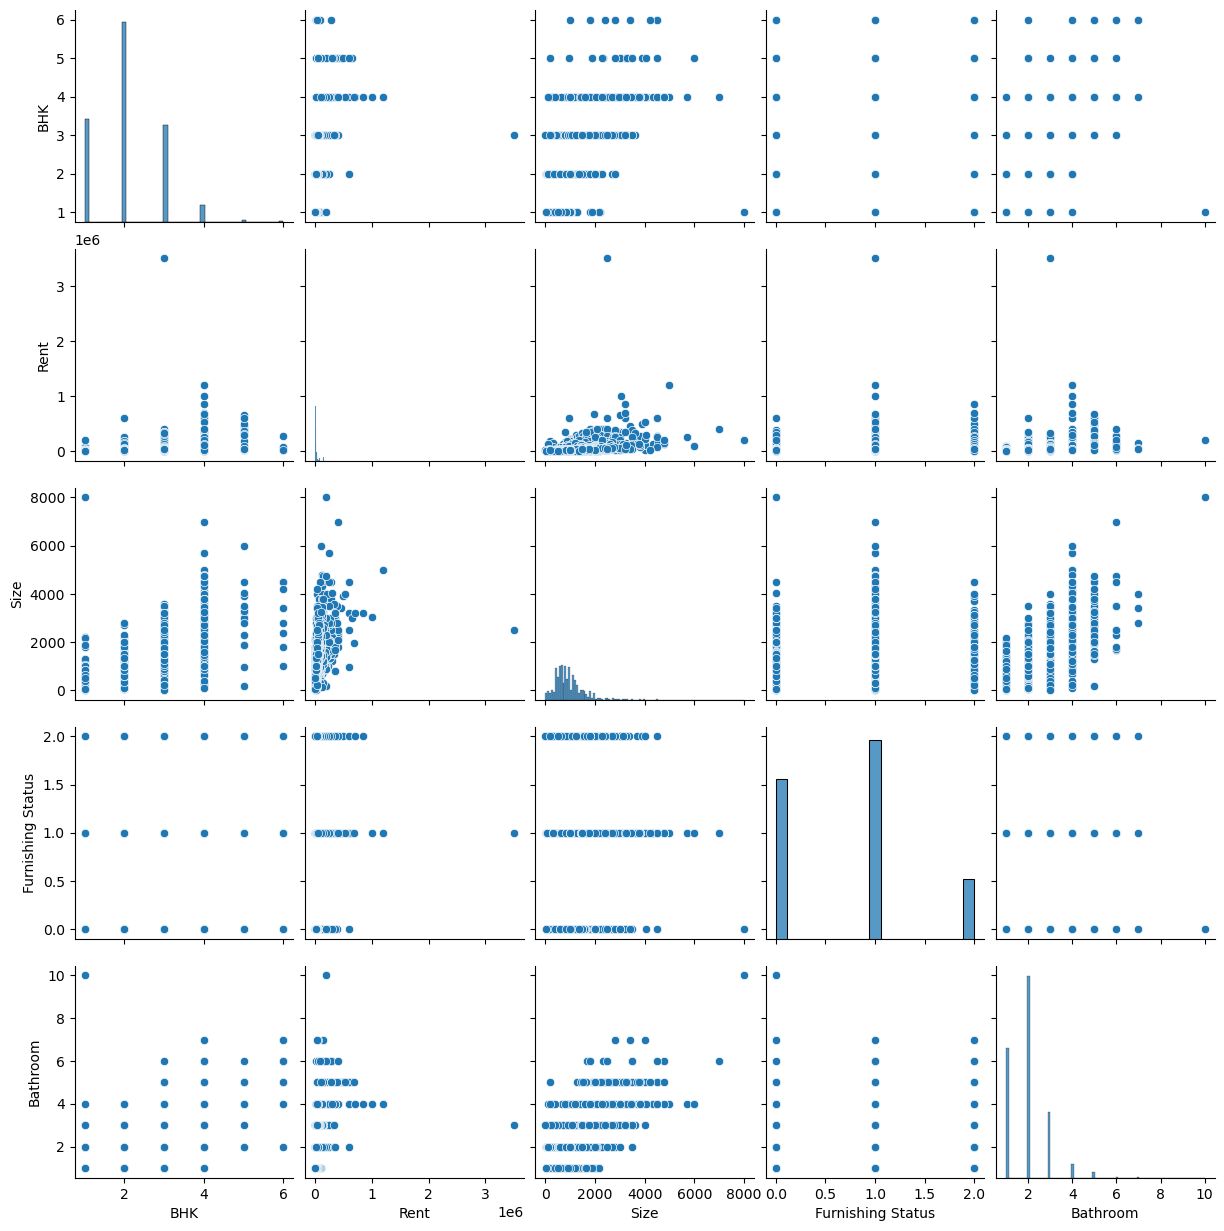

In [8]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load and clean the dataset
df = pd.read_csv("house_rent_dataset.csv") # Read the csv file
df.head() # Display the first five rows

df.info() # Display the summary of the data

df.isnull().sum() # Check for missing values

df["Furnishing Status"].value_counts() # Check the distribution of the categorical variable

df["Furnishing Status"] = df["Furnishing Status"].map({"Unfurnished":0, "Semi-Furnished":1, "Furnished":2}) # Encode the categorical variable as numeric

df.head() # Display the first five rows after encoding

df.describe() # Display the descriptive statistics of the data
sns.pairplot(df) # Plot pairwise relationships between variables
plt.show() # Show the plot

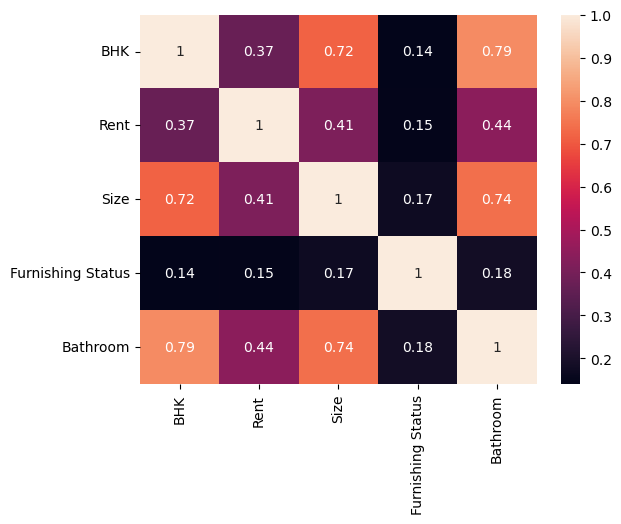

In [9]:
sns.heatmap(df.corr(), annot=True) # Plot a heatmap of correlation coefficients between variables
plt.show() # Show the plot

Coefficients: [-8.61242146e+01  2.03367797e+01  6.75111887e+03  2.69226834e+04]
Intercept: -42447.03852458798
Mean squared error: 2528160570.035456
R-squared score: 0.36564148601251845


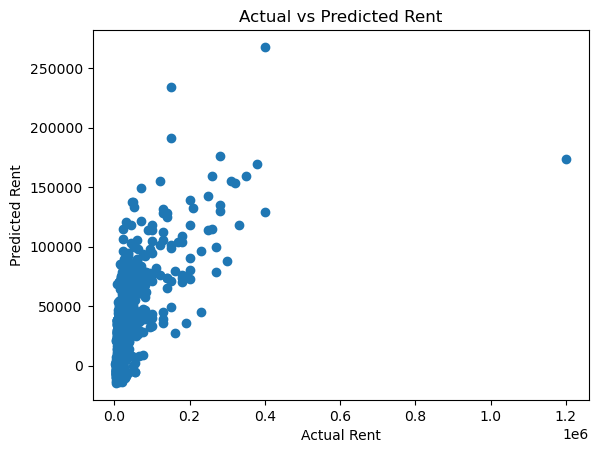

In [10]:
X = df.drop(["Rent", "Posted On", "Floor", "Area Type", "Area Locality", "City", "Tenant Preferred", "Point of Contact"], axis=1) # Define the features matrix (all columns except Rent and other irrelevant columns)
y = df["Rent"] # Define the target vector (Rent column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data into training and testing sets (80% training, 20% testing)

model = LinearRegression() # Create a linear regression model object
model.fit(X_train, y_train) # Fit the model on the training data

y_pred = model.predict(X_test) # Predict the rent on the testing data

print("Coefficients:", model.coef_) # Print the coefficients of the model
print("Intercept:", model.intercept_) # Print the intercept of the model
print("Mean squared error:", mean_squared_error(y_test, y_pred)) # Print the mean squared error of the predictions
print("R-squared score:", r2_score(y_test, y_pred)) # Print the R-squared score of the predictions

plt.scatter(y_test, y_pred) # Plot the actual vs predicted rent values
plt.xlabel("Actual Rent") # Label the x-axis
plt.ylabel("Predicted Rent") # Label the y-axis
plt.title("Actual vs Predicted Rent") # Give a title to the plot
plt.show() # Show the plot